In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
#Reading dataset 
data=pd.read_csv(r"C:\Users\neema\OneDrive\Desktop\Neema\Essex Class\dissertation\Neema Final\Neema Final\competitor_influencer_similarity.csv", low_memory=False)

In [3]:
data

,competitor_name,influencer_name,similarity_score
0,bulk,aaroncgshore,0.052173
1,bulk,adamcollard,0.112365
2,bulk,aliceliveing,0.105055
3,bulk,brown.elle,0.031806
4,bulk,charlottedawsy,0.096758
...,...,...,...
295,puresport,slimmingworld,0.168555
296,puresport,sylvijaa,0.045350
297,puresport,thebodycoach,0.110334
298,puresport,thefitnesschef_,0.122526


In [4]:
x = data.iloc[:, [2]]

In [5]:
x  = np.array(x)

In [15]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
     }

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_) 

ValueError: could not convert string to float: 'bulk'

In [8]:
#K-means clustering
kmeans_model = KMeans(n_clusters=3,  random_state=32932)
# Fit into our dataset fit
kmeans_predict = kmeans_model.fit_predict(x)

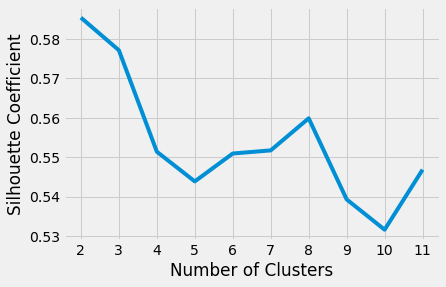

In [9]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 12), silhouette_coefficients)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [10]:
#Forming the cluster column
data['Cluster'] = kmeans_predict

In [11]:
data.sort_values(
    by="Cluster",
    ascending=True
    )

,competitor_name,influencer_name,similarity_score,Cluster
0,bulk,aaroncgshore,0.052173,0
144,motionnutrition,rogersnipes,0.070397,0
146,motionnutrition,sylvijaa,0.061605,0
148,motionnutrition,thefitnesschef_,0.059505,0
150,neat_nutrition,aaroncgshore,0.054774,0
...,...,...,...,...
185,neurohacker,chessieking,0.100464,2
57,formnutrition,thebodycoach,0.095840,2
187,neurohacker,courtneydblack,0.087456,2
191,neurohacker,itsalwayshana,0.082188,2


In [12]:
data['Cluster'].value_counts()

0    152
2    125
1     23
Name: Cluster, dtype: int64

In [14]:
x=data[(data['Cluster']==0)]
x.head(100)

,competitor_name,influencer_name,similarity_score,Cluster
0,bulk,aaroncgshore,0.052173,0
3,bulk,brown.elle,0.031806,0
6,bulk,chloe.khan,0.055821,0
10,bulk,ini.helen,0.032789,0
12,bulk,jamesgshore,0.066546,0
...,...,...,...,...
186,neurohacker,chloe.khan,0.037669,0
188,neurohacker,danosborneofficial,0.056434,0
190,neurohacker,ini.helen,0.016944,0
192,neurohacker,jamesgshore,0.045464,0
